# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [1]:
%pip install iso3166

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [2]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.3/15.3 MB 76.1 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.13.1
    Uninstalling plotly-5.13.1:
      Successfully uninstalled plotly-5.13.1


### Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [6]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [7]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [8]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

In [9]:
df_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [10]:
print(f"NaN values:{df_data.isna().values.any()}")
print(f"Duplicated values:{df_data.duplicated().values.any()}")

NaN values:True
Duplicated values:False


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [11]:
junk = ["Unnamed: 0.1", "Unnamed: 0", "Detail"]
df_data.drop(junk, inplace=True, axis=1)
df_data.head()

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",StatusActive,145.0,Success


In [12]:
### Convert Price Data Type
df_data.Price = df_data.Price.replace(",", "", regex=True)
df_data.Price = df_data.Price.astype("float64")
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Organisation    4324 non-null   object 
 1   Location        4324 non-null   object 
 2   Date            4324 non-null   object 
 3   Rocket_Status   4324 non-null   object 
 4   Price           964 non-null    float64
 5   Mission_Status  4324 non-null   object 
dtypes: float64(1), object(5)
memory usage: 202.8+ KB


In [13]:
### Replace 'NaN' values with the average
avg = df_data.Price.mean()
df_data.Price.replace(np.nan, avg, inplace=True)
df_data.Date.dtype
df_data.head(10)

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",StatusActive,153.79,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China","Sat Jul 25, 2020 03:13 UTC",StatusActive,64.68,Success
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan","Thu Jul 23, 2020 14:26 UTC",StatusActive,48.50,Success
7,CASC,"LC-101, Wenchang Satellite Launch Center, China","Thu Jul 23, 2020 04:41 UTC",StatusActive,153.79,Success
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA","Mon Jul 20, 2020 21:30 UTC",StatusActive,50.00,Success
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan","Sun Jul 19, 2020 21:58 UTC",StatusActive,90.00,Success


In [14]:
### Coverting Date to datetime64 
df_data.Date = pd.to_datetime(df_data.Date, utc=True)
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   Organisation    4324 non-null   object             
 1   Location        4324 non-null   object             
 2   Date            4324 non-null   datetime64[ns, UTC]
 3   Rocket_Status   4324 non-null   object             
 4   Price           4324 non-null   float64            
 5   Mission_Status  4324 non-null   object             
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 202.8+ KB


## Descriptive Statistics

In [15]:
df_data.describe()

,Price
count,"4,324.00"
mean,153.79
std,136.14
min,5.30
25%,153.79
50%,153.79
75%,153.79
max,"5,000.00"


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [16]:
org_df = df_data["Organisation"].value_counts()
org_df

RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


In [17]:
fig = px.bar(x=org_df.values, y=org_df.index, orientation='h', color=org_df.index, title="Launches per company")

fig.update_layout(xaxis_title='Number of Launches', 
                    coloraxis_showscale=False,
                    yaxis_title='Company',
                  yaxis=dict(autorange="reversed"),
                  width=1000,
                  height=750)


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [18]:
activity = df_data["Rocket_Status"].value_counts()
activity

StatusRetired    3534
StatusActive      790
Name: Rocket_Status, dtype: int64

In [19]:
pie_fig = px.pie(values=activity.values, names = activity.index, title="Rocket Status", color=activity.index, color_discrete_map={"StatusRetired":"orange", "StatusActive": "green"})
pie_fig.show()

# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [20]:
status = df_data["Mission_Status"].value_counts()
status

Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: Mission_Status, dtype: int64

# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

In [21]:
### Here the choice was to exclude the previos missing values (that wer replace by the average)
hist_data = df_data[df_data.Price != avg]
hist_data.head(10)

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,StatusActive,50.00,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,StatusActive,29.75,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,StatusActive,65.00,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,StatusActive,145.00,Success
5,CASC,"LC-9, Taiyuan Satellite Launch Center, China",2020-07-25 03:13:00+00:00,StatusActive,64.68,Success
6,Roscosmos,"Site 31/6, Baikonur Cosmodrome, Kazakhstan",2020-07-23 14:26:00+00:00,StatusActive,48.50,Success
8,SpaceX,"SLC-40, Cape Canaveral AFS, Florida, USA",2020-07-20 21:30:00+00:00,StatusActive,50.00,Success
9,JAXA,"LA-Y1, Tanegashima Space Center, Japan",2020-07-19 21:58:00+00:00,StatusActive,90.00,Success
10,Northrop,"LP-0B, Wallops Flight Facility, Virginia, USA",2020-07-15 13:46:00+00:00,StatusActive,46.00,Success
11,ExPace,"Site 95, Jiuquan Satellite Launch Center, China",2020-07-10 04:17:00+00:00,StatusActive,28.30,Failure


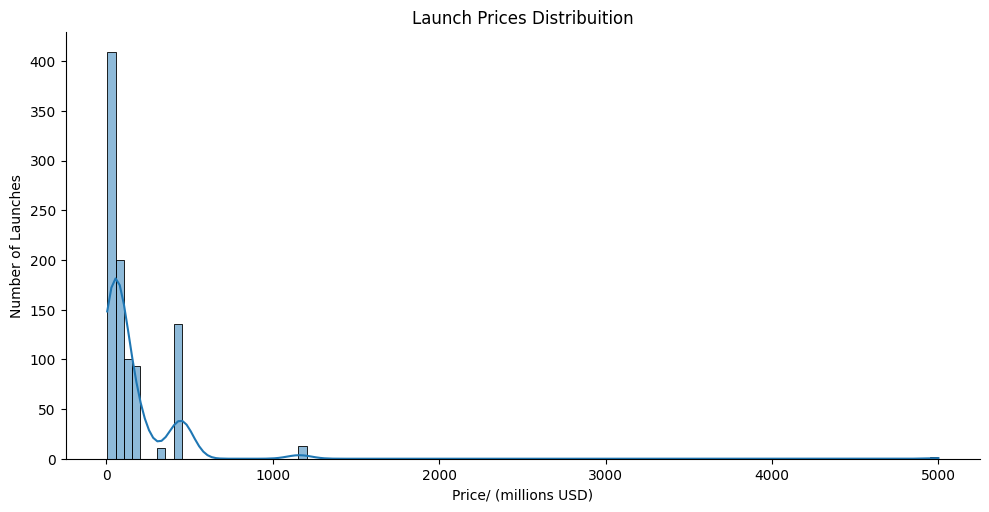

In [22]:
sns.displot(hist_data.Price,
            bins=100,
            kde=True,
            aspect=2)
plt.title("Launch Prices Distribuition")
plt.xlabel('Price/ (millions USD)')
plt.ylabel('Number of Launches')

plt.show()

There are to entries in 5 bilions. As we can see below both are track to the USSR.

In [23]:
hist_data.sort_values(["Price"], ascending=False)[:10]

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status
1916,RVSN USSR,"Site 110/37, Baikonur Cosmodrome, Kazakhstan",1988-11-15 03:00:00+00:00,StatusRetired,"5,000.00",Success
2000,RVSN USSR,"Site 250, Baikonur Cosmodrome, Kazakhstan",1987-05-15 17:30:00+00:00,StatusRetired,"5,000.00",Success
3545,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-07-16 13:32:00+00:00,StatusRetired,"1,160.00",Success
3603,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1968-12-21 12:51:00+00:00,StatusRetired,"1,160.00",Success
3475,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1970-04-11 19:13:00+00:00,StatusRetired,"1,160.00",Success
3511,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-11-14 16:22:00+00:00,StatusRetired,"1,160.00",Success
3243,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1972-04-16 17:54:00+00:00,StatusRetired,"1,160.00",Success
3560,NASA,"LC-39B, Kennedy Space Center, Florida, USA",1969-05-18 16:49:00+00:00,StatusRetired,"1,160.00",Success
3180,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1972-12-19 19:24:00+00:00,StatusRetired,"1,160.00",Success
3584,NASA,"LC-39A, Kennedy Space Center, Florida, USA",1969-03-03 16:00:00+00:00,StatusRetired,"1,160.00",Success


# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [24]:
pd.set_option('display.max_rows', None)
loc = df_data["Location"].value_counts()
print(loc)

Site 31/6, Baikonur Cosmodrome, Kazakhstan                                                 235
Site 132/1, Plesetsk Cosmodrome, Russia                                                    216
Site 43/4, Plesetsk Cosmodrome, Russia                                                     202
Site 41/1, Plesetsk Cosmodrome, Russia                                                     198
Site 1/5, Baikonur Cosmodrome, Kazakhstan                                                  193
Site 132/2, Plesetsk Cosmodrome, Russia                                                    174
Site 133/3, Plesetsk Cosmodrome, Russia                                                    158
Site 43/3, Plesetsk Cosmodrome, Russia                                                     138
LC-39A, Kennedy Space Center, Florida, USA                                                 120
ELA-2, Guiana Space Centre, French Guiana, France                                          118
SLC-40, Cape Canaveral AFS, Florida, USA          

In [25]:
import iso3166
### Retrieve the country from the location column
ISO = []
correction = {"Russia": "Russian Federation", "New Mexico":"USA", "Yellow Sea": "China", "Shahrud Missile Test Site": "ir", "Pacific Missile Range Facility":"USA", "Barents Sea": "Russian Federation", "Gran Canaria": "USA", "North Korea": "kp", "South Korea": "kr", "Iran": "ir"}
for location in df_data["Location"]:
  country = location.split(", ")[-1]
  if country in correction:
    country = correction[country]

  if "USA" in country or country == "Pacific Ocean":
    ISO.append("USA")
  else:
    c = iso3166.countries.get(country)
    ISO.append(c.alpha3)
print(ISO)
df_data["ISO"] = ISO
df_data.head()


['USA', 'CHN', 'USA', 'KAZ', 'USA', 'CHN', 'KAZ', 'CHN', 'USA', 'JPN', 'USA', 'CHN', 'CHN', 'ISR', 'CHN', 'NZL', 'CHN', 'USA', 'CHN', 'CHN', 'USA', 'NZL', 'CHN', 'USA', 'CHN', 'USA', 'CHN', 'USA', 'RUS', 'JPN', 'USA', 'CHN', 'CHN', 'KAZ', 'USA', 'IRN', 'CHN', 'KAZ', 'USA', 'CHN', 'KAZ', 'USA', 'RUS', 'CHN', 'CHN', 'USA', 'RUS', 'CHN', 'FRA', 'USA', 'USA', 'USA', 'IRN', 'JPN', 'KAZ', 'NZL', 'USA', 'USA', 'FRA', 'CHN', 'CHN', 'CHN', 'USA', 'CHN', 'RUS', 'KAZ', 'USA', 'CHN', 'FRA', 'USA', 'CHN', 'USA', 'IND', 'RUS', 'CHN', 'CHN', 'KAZ', 'NZL', 'USA', 'CHN', 'IND', 'FRA', 'RUS', 'CHN', 'CHN', 'CHN', 'CHN', 'USA', 'CHN', 'CHN', 'USA', 'USA', 'CHN', 'NZL', 'USA', 'KAZ', 'CHN', 'RUS', 'KAZ', 'CHN', 'JPN', 'CHN', 'CHN', 'CHN', 'CHN', 'RUS', 'IRN', 'USA', 'KAZ', 'NZL', 'CHN', 'CHN', 'USA', 'USA', 'FRA', 'KAZ', 'KAZ', 'RUS', 'CHN', 'USA', 'CHN', 'IND', 'KAZ', 'KAZ', 'FRA', 'RUS', 'RUS', 'USA', 'NZL', 'USA', 'CHN', 'FRA', 'USA', 'CHN', 'KAZ', 'RUS', 'USA', 'CHN', 'IND', 'CHN', 'NZL', 'USA', 'USA'

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status,ISO
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA",2020-08-07 05:12:00+00:00,StatusActive,50.00,Success,USA
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...",2020-08-06 04:01:00+00:00,StatusActive,29.75,Success,CHN
2,SpaceX,"Pad A, Boca Chica, Texas, USA",2020-08-04 23:57:00+00:00,StatusActive,153.79,Success,USA
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan",2020-07-30 21:25:00+00:00,StatusActive,65.00,Success,KAZ
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA",2020-07-30 11:50:00+00:00,StatusActive,145.00,Success,USA


In [26]:
df_maps = df_data["ISO"].value_counts()
df_maps

RUS    1398
USA    1387
KAZ     701
FRA     303
CHN     269
JPN     126
IND      76
IRN      14
NZL      13
ISR      11
KEN       9
AUS       6
PRK       5
KOR       3
BRA       3
Name: ISO, dtype: int64

In [27]:
world_map = px.choropleth(locations = df_maps.index,
                    color=df_maps.values,
                    color_continuous_scale=px.colors.sequential.matter,
                    title = "Number of Launches per Country"
                    )
world_map.update_layout(coloraxis_showscale=True)
world_map.show()


# Use a Choropleth Map to Show the Number of Failures by Country


In [28]:
df_failure=df_data[df_data["Mission_Status"] == "Failure"]
failures=df_failure["ISO"].value_counts()

In [29]:
world_map = px.choropleth(locations = failures.index,
                    color=failures.values,
                    color_continuous_scale=px.colors.sequential.matter,
                    title="Number of Failures by Country"
                    )
world_map.update_layout(coloraxis_showscale=True)
world_map.show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [30]:
country_org_mis = df_data.groupby(by=['ISO', 'Organisation', "Mission_Status"], as_index=False).agg({'Mission_Status': "count"})
country_org_mis.head()

,ISO,Organisation,Mission_Status
0,AUS,AMBA,1
1,AUS,CECLES,2
2,AUS,CECLES,1
3,AUS,RAE,1
4,AUS,RAE,1


In [31]:
sun_b = px.sunburst(country_org_mis, path=['ISO', 'Organisation', "Mission_Status"], values='Mission_Status')
sun_b.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [32]:
spent = df_data.groupby(['Organisation']).agg({"Price": "sum"})
spent.sort_values(by='Price', ascending=False, inplace=True)
spent.head(15)

,Price
Organisation,
RVSN USSR,"282,981.15"
NASA,"84,584.78"
Arianespace,"44,488.97"
General Dynamics,"38,601.84"
VKS RF,"27,385.99"
US Air Force,"22,312.87"
ULA,"21,257.27"
Boeing,"21,080.19"
CASC,"20,642.93"


# Analyse the Amount of Money Spent by Organisation per Launch

In [33]:
df_clean = df_data[df_data['Price'] != avg]
spent_per_launch = df_clean.groupby(['Organisation']).agg({"Price": "sum", "Organisation": "count"})
spent_per_launch.head()

,Price,Organisation
Organisation,,
Arianespace,"16,345.00",96
Boeing,"1,241.00",7
CASC,"6,340.26",158
EER,20.00,1
ESA,37.00,1


In [34]:
spent_per_launch['Ratio'] = spent_per_launch['Price']/ spent_per_launch['Organisation']

In [35]:
fig = px.bar(x=spent_per_launch['Ratio'], y=spent_per_launch.index, orientation='h', color=spent_per_launch.index, title="Total spent per launch")

fig.update_layout(xaxis_title='Spent per Launch', 
                    coloraxis_showscale=False,
                    yaxis_title='Company',
                  yaxis=dict(autorange="reversed"),
                  width=1000,
                  height=750)

# Chart the Number of Launches per Year

In [36]:
year = df_data['Date'].dt.year
df_data["Year"] = year

launches_year = df_data["Year"].value_counts()
launches_year

1971    119
2018    117
1977    114
1975    113
1976    113
2019    109
1970    107
1967    106
1973    103
1968    103
1969    103
1966    101
1972     99
1974     98
1978     97
2017     92
2016     90
1965     87
1962     82
1990     80
1985     74
1981     71
1997     70
1984     69
1998     68
1982     67
1983     66
1994     64
2020     63
1992     62
1986     62
1993     61
1995     61
1996     60
1964     60
1988     59
1991     59
1999     57
2000     57
1987     56
1980     55
2014     53
1961     52
2003     52
2015     52
1989     52
2009     50
2007     50
1979     49
2002     49
2006     49
2008     48
2013     46
2001     43
2011     42
1963     41
2004     40
1960     39
2012     38
2010     37
2005     37
1958     28
1959     20
1957      3
Name: Year, dtype: int64

In [37]:
fig = px.bar(x=launches_year.index, y=launches_year.values, color=launches_year.index, title="Launch per Year")

fig.update_layout(xaxis_title='Year', 
                    coloraxis_showscale=False,
                    yaxis_title='Number of Launches')

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [38]:
### Convert the 'Date' into a YYYY-MM timesptamp
month_year = df_data['Date'].dt.strftime('%Y-%m')
month_year[:10]
launches_month = month_year.value_counts()
launches_month[:10]

df_l_months = pd.DataFrame(launches_month).reset_index()
df_l_months.columns = ["Date", "Launches"]
df_l_months.sort_values(by=['Date'], inplace=True)
df_l_months["Date"] = pd.to_datetime(df_l_months["Date"])


roll_avg = df_l_months['Launches'].rolling(window=7).mean()
df_l_months["Avg"] = roll_avg


df_l_months.head(15)

,Date,Launches,Avg
746,1957-10-01,1,NaN
725,1957-11-01,1,NaN
724,1957-12-01,1,NaN
664,1958-02-01,2,NaN
573,1958-03-01,3,NaN
665,1958-04-01,2,NaN
666,1958-05-01,2,1.71
717,1958-06-01,1,1.71
667,1958-07-01,2,1.86
234,1958-08-01,7,2.71


Text(0, 0.5, 'Launches')

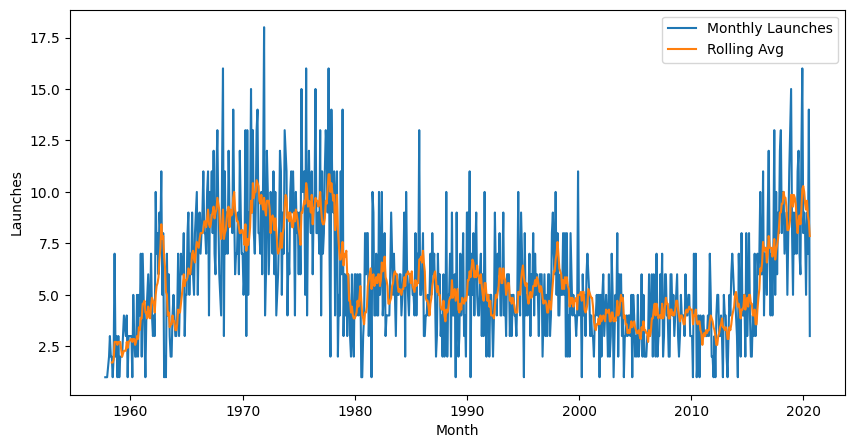

In [39]:
plt.figure(figsize=(10, 5))
sns.lineplot(x=df_l_months["Date"],
             y=df_l_months["Launches"],
             data=df_l_months,
             label='Monthly Launches')

sns.lineplot( x=df_l_months['Date'],
             y =df_l_months["Avg"],
             data =df_l_months,
             label = 'Rolling Avg',
             )
plt.xlabel("Month")
plt.ylabel("Launches")


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [40]:
month_launch = df_data['Date'].dt.month
df_data["Month"] = month_launch

month_on_month = df_data["Month"].value_counts()
month_on_month

12    450
6     402
4     383
10    381
8     373
9     365
3     353
7     351
2     336
11    336
5     326
1     268
Name: Month, dtype: int64

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [41]:
df_price = df_data[df_data.Price != 153.79]
df_price_year = df_price.groupby(["Year"]).mean("Price")
df_price_year.reset_index()

,Year,Price,Month
0,1957,153.79,11.00
1,1958,153.79,7.21
2,1959,153.79,7.00
3,1960,153.79,7.85
4,1961,153.79,6.85
5,1962,153.79,7.20
6,1963,153.79,7.07
7,1964,150.77,6.97
8,1965,151.71,6.83
9,1966,150.98,6.88


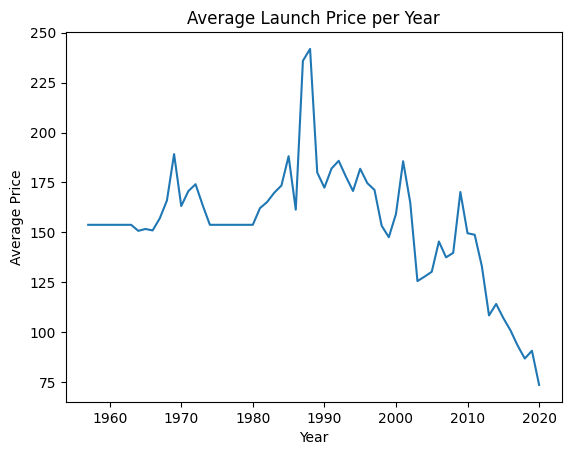

In [42]:
sns.lineplot(data=df_price_year, x=df_price_year.index, y=df_price_year["Price"])
plt.title("Average Launch Price per Year")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [43]:
orgs = df_data["Organisation"].value_counts()
top_10 = orgs.index[:10]
top_10

Index(['RVSN USSR', 'Arianespace', 'CASC', 'General Dynamics', 'NASA',
       'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta'],
      dtype='object')

In [44]:
# for top_10:
df=df_data.query("Organisation in ('RVSN USSR', 'Arianespace', 'CASC', 'General Dynamics', 'NASA', 'VKS RF', 'US Air Force', 'ULA', 'Boeing', 'Martin Marietta')")
df_top10=df.groupby(by=["Organisation","Year"]).agg({"Year":"count"})
df_top10.reset_index(level=[0], inplace=True)
df_top10.head()



,Organisation,Year
Year,,
1984,Arianespace,3
1985,Arianespace,4
1986,Arianespace,3
1987,Arianespace,2
1988,Arianespace,6


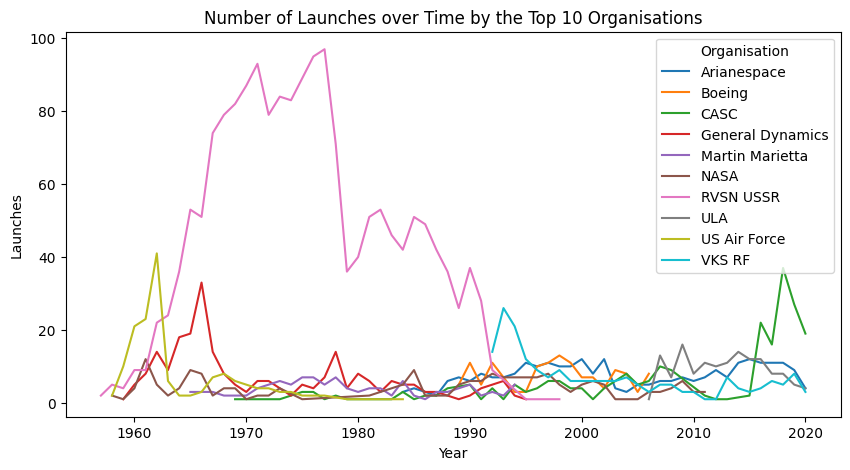

In [45]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_top10, x=df_top10.index, y=df_top10.Year, hue=df_top10.Organisation)
plt.title("Number of Launches over Time by the Top 10 Organisations")
plt.xlabel("Year")
plt.ylabel("Launches")
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [46]:
cold_war = df_data[df_data["Year"] < 1982]

In [47]:
cold_war.head()

,Organisation,Location,Date,Rocket_Status,Price,Mission_Status,ISO,Year,Month
2361,RVSN USSR,"Site 1/5, Baikonur Cosmodrome, Kazakhstan",1981-12-23 13:15:00+00:00,StatusRetired,153.79,Success,KAZ,1981,12
2362,ESA,"ELV-1 (SLV), Guiana Space Centre, French Guian...",1981-12-20 01:29:00+00:00,StatusRetired,153.79,Success,FRA,1981,12
2363,General Dynamics,"SLC-3E, Vandenberg AFB, California, USA",1981-12-19 01:10:00+00:00,StatusRetired,153.79,Failure,USA,1981,12
2364,RVSN USSR,"Site 132/2, Plesetsk Cosmodrome, Russia",1981-12-17 00:00:00+00:00,StatusRetired,153.79,Success,RUS,1981,12
2365,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1981-12-15 23:35:00+00:00,StatusRetired,153.79,Success,USA,1981,12


In [48]:
eua_ussr = cold_war.query("ISO in ('RUS', 'KAZ', 'USA')")
data_pie = eua_ussr['ISO'].value_counts()


## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [58]:
pie_fig = px.pie(values=data_pie.values, names = data_pie.index, title="Total number of Launches USSR and USA", color=data_pie.index, hole=0.3)
pie_fig.show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [50]:
line_cold = eua_ussr.groupby(["ISO","Year"], as_index=False).count()
line_cold.head()



,ISO,Year,Organisation,Location,Date,Rocket_Status,Price,Mission_Status,Month
0,KAZ,1957,2,2,2,2,2,2,2
1,KAZ,1958,5,5,5,5,5,5,5
2,KAZ,1959,4,4,4,4,4,4,4
3,KAZ,1960,9,9,9,9,9,9,9
4,KAZ,1961,7,7,7,7,7,7,7


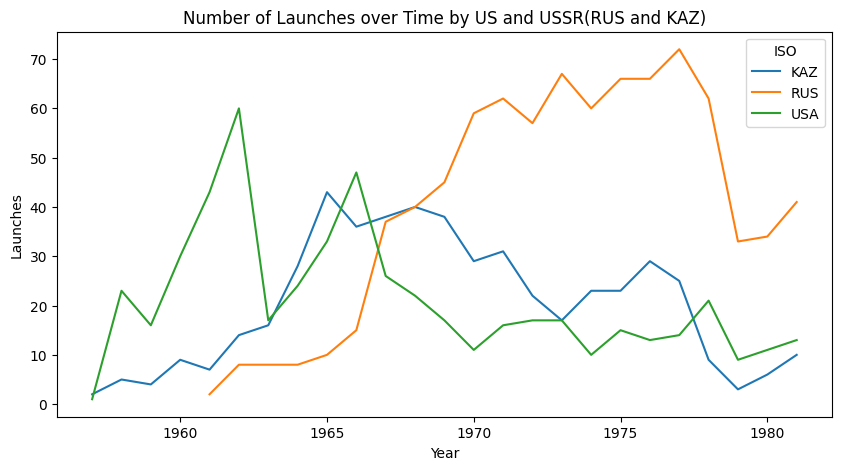

In [51]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=line_cold, x=line_cold.Year, y=line_cold.Mission_Status, hue=line_cold.ISO)
plt.title("Number of Launches over Time by US and USSR(RUS and KAZ)")
plt.xlabel("Year")
plt.ylabel("Launches")
plt.show()

## Chart the Total Number of Mission Failures Year on Year.

In [52]:
failures_df = eua_ussr[eua_ussr["Mission_Status"] == "Failure"]
failure=failures_df.groupby(["ISO", "Year"], as_index=False)["Mission_Status"].count()

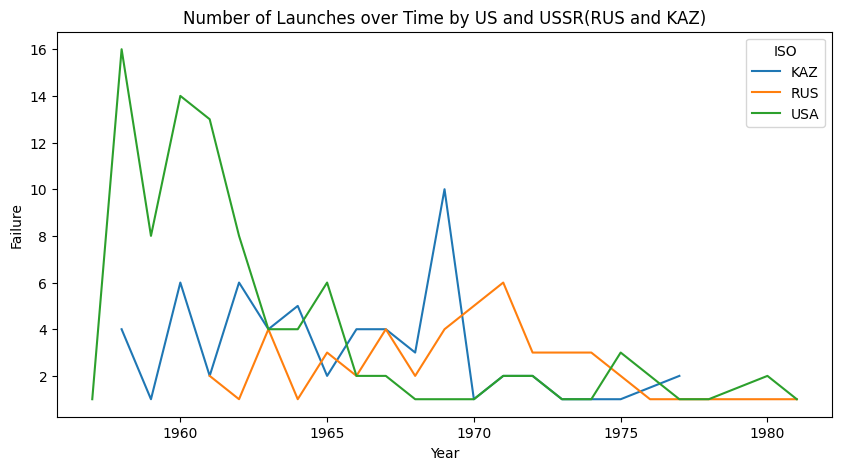

In [53]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=failure, x=failure.Year, y=failure.Mission_Status, hue=failure.ISO)
plt.title("Number of Launches over Time by US and USSR(RUS and KAZ)")
plt.xlabel("Year")
plt.ylabel("Failure")
plt.show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [88]:
df2 = df_data.groupby(["Year"], as_index=False)["Mission_Status"].value_counts()
df2.head()

,Year,Mission_Status,count
0,1957,Success,2
1,1957,Failure,1
2,1958,Failure,20
3,1958,Success,6
4,1958,Partial Failure,2


In [96]:
fig = px.bar(df2, x="Year", y="count", color="Mission_Status", title="Mission Status per Year", labels={"count": "Launches"})

fig.show()

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [94]:
df_Y = df_data.groupby(["ISO", "Year"], as_index=False)["Mission_Status"].count()
max_df = pd.DataFrame()
for year in range(1957, 2021):
  new_df = df_Y[df_Y["Year"] == year]
  new_row = (new_df[new_df.Mission_Status == new_df.Mission_Status.max()])
  
  max_df = max_df.append(new_row)
max_df.head(30)

<ipython-input-94-b90dd9b17ae8>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-94-b90dd9b17ae8>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-94-b90dd9b17ae8>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-94-b90dd9b17ae8>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-94-b90dd9b17ae8>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-94-b90dd9b17ae8>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pand

,ISO,Year,Mission_Status
207,KAZ,1957,2
349,USA,1958,23
350,USA,1959,16
351,USA,1960,30
352,USA,1961,43
353,USA,1962,60
354,USA,1963,17
214,KAZ,1964,28
215,KAZ,1965,43
357,USA,1966,47


In [104]:
fig = px.bar(max_df, x="Year", y="Mission_Status", color="ISO", title="Lead Country (Number of Launches) per Year", labels={"Mission_Status": "Number of Launches"})
fig.update_layout(barmode='group') #Unstacked bars. Both KAZ and RUS where tied with 40 launches in 1968
fig.show()

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [116]:
df_org = df_data.groupby(["Organisation", "Year"], as_index=False)["Mission_Status"].count()
max_org = pd.DataFrame()
for year in range(1957, 2021):
  new_df = df_org[df_org["Year"] == year]
  new_row = (new_df[new_df.Mission_Status == new_df.Mission_Status.max()])
  
  max_org = max_org.append(new_row)
max_org.head(30)


<ipython-input-116-a7413229f164>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-116-a7413229f164>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-116-a7413229f164>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-116-a7413229f164>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-116-a7413229f164>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

<ipython-input-116-a7413229f164>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Us

,Organisation,Year,Mission_Status
497,RVSN USSR,1957,2
624,US Navy,1958,12
599,US Air Force,1959,10
600,US Air Force,1960,21
601,US Air Force,1961,23
602,US Air Force,1962,41
503,RVSN USSR,1963,24
504,RVSN USSR,1964,36
505,RVSN USSR,1965,53
506,RVSN USSR,1966,51


In [117]:
fig = px.bar(max_org, x="Year", y="Mission_Status", color="Organisation", title="Lead Org (Number of Launches) per Year", labels={"Mission_Status": "Number of Launches"})
fig.update_traces(offset=5, selector=dict(type='bar'))
fig.update_layout(barmode='group') #Unstacked bars. Both KAZ and RUS where tied with 40 launches in 1968
fig.show()

In [ ]:
# df_org.sort_values(by="Year")
# # max_org